Analyze the result produced by 06.monte_carlo_test

V2 version:
- Migrate to Lab Desktop
- Added triple box plot (but it doesn't look nice)

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
TITLE_SIZE = 16
LABEL_SIZE = 16
TICK_SIZE = 14
LEGEND_SIZE = 16

# Load result sheet and sort

In [27]:
# folder = '/content/drive/My Drive/time_sequence_alchemy/test_result/'
folder = './' # on local desktop
#fn = 'monte_carlo_results.csv'
fn = 'monte_carlo_results_imbalance.csv'

df = pd.read_csv(folder+fn)
df

,id,model_name,data_trim,ts_thres,pred_thres,repeat_id,epochs,test_acc,test_p,test_r,test_f1
0,1,CNN_1,False,120,0.5,1,4,0.998123,0.999199,0.971184,0.984992
1,2,CNN_1,False,120,0.5,2,4,0.999605,0.994574,0.999221,0.996892
2,3,CNN_1,False,120,0.5,3,4,0.999506,0.993798,0.998442,0.996115
3,4,CNN_1,False,120,0.5,4,4,0.999556,0.994569,0.998442,0.996502
4,5,CNN_1,False,120,0.5,5,4,0.999407,0.992260,0.998442,0.995342
...,...,...,...,...,...,...,...,...,...,...,...
335,346,TS_RNN_ZOH,False,1920,0.5,6,4,0.991769,0.892368,0.924949,0.908367
336,347,TS_RNN_ZOH,False,1920,0.5,7,4,0.994930,0.994709,0.889790,0.939329
337,348,TS_RNN_ZOH,False,1920,0.5,8,4,0.995914,0.978602,0.927654,0.952447
338,349,TS_RNN_ZOH,False,1920,0.5,9,4,0.994930,0.994709,0.889790,0.939329


In [28]:
# IMPORTANT. Sort table by model names, otherwise the double_wisker function will behave differently.
# change the model names for sorting
df = df.replace('CNN_1', '1_CNN')
df = df.replace('TS_CNN_ZOH', '2_TS_CNN_ZOH')
df = df.replace('TS_CNN_1', '3_TS_CNN_LIN')
df = df.replace('RNN_1', '4_RNN')
df = df.replace('TS_RNN_ZOH', '5_TS_RNN_ZOH')
df = df.replace('TS_RNN_1', '6_TS_RNN_LIN')
df = df.sort_values(by='model_name', ascending=True)
# change model names for display
df = df.replace('1_CNN', 'CNN')
df = df.replace('2_TS_CNN_ZOH', 'TS_CNN_ZOH')
df = df.replace('3_TS_CNN_LIN', 'TS_CNN_LIN')
df = df.replace('4_RNN', 'RNN')
df = df.replace('5_TS_RNN_ZOH', 'TS_RNN_ZOH')
df = df.replace('6_TS_RNN_LIN', 'TS_RNN_LIN')
df

,id,model_name,data_trim,ts_thres,pred_thres,repeat_id,epochs,test_acc,test_p,test_r,test_f1
0,1,CNN,False,120,0.5,1,4,0.998123,0.999199,0.971184,0.984992
122,133,CNN,False,480,0.5,3,4,0.998593,0.975627,1.000000,0.987663
121,132,CNN,False,480,0.5,2,4,0.998552,0.974928,1.000000,0.987305
120,131,CNN,False,480,0.5,1,4,0.998386,0.972143,1.000000,0.985875
89,100,CNN,False,240,0.5,10,4,0.999155,0.987102,0.999232,0.993130
...,...,...,...,...,...,...,...,...,...,...,...
153,164,TS_RNN_LIN,False,480,0.5,4,4,0.990978,0.916849,0.923586,0.920205
152,163,TS_RNN_LIN,False,480,0.5,3,4,0.992509,0.910864,0.961058,0.935288
151,162,TS_RNN_LIN,False,480,0.5,2,4,0.990274,0.906205,0.922851,0.914452
193,204,TS_RNN_LIN,False,960,0.5,4,4,0.995622,0.996923,0.917197,0.955400


In [6]:
# Remove results caused by failed training. there is none.
thres = 0.95
print(df.loc[df.test_acc < thres])
df = df.loc[df.test_acc >= thres]

Empty DataFrame
Columns: [id, model_name, data_trim, ts_thres, pred_thres, repeat_id, epochs, test_acc, test_p, test_r, test_f1]
Index: []


# box plot example (for demo only)

In [23]:
df1 = df.loc[df.model_name=='CNN']
df1 = df1.loc[df1.ts_thres==120]
df1

,id,model_name,data_trim,ts_thres,pred_thres,repeat_id,epochs,test_acc,test_p,test_r,test_f1
0,1,CNN,False,120,0.5,1,4,0.998123,0.999199,0.971184,0.984992
1,2,CNN,False,120,0.5,2,4,0.999605,0.994574,0.999221,0.996892
2,3,CNN,False,120,0.5,3,4,0.999506,0.993798,0.998442,0.996115
3,4,CNN,False,120,0.5,4,4,0.999556,0.994569,0.998442,0.996502
4,5,CNN,False,120,0.5,5,4,0.999407,0.992260,0.998442,0.995342
5,6,CNN,False,120,0.5,6,4,0.998716,0.980153,1.000000,0.989977
6,7,CNN,False,120,0.5,7,4,0.999556,0.994569,0.998442,0.996502
7,8,CNN,False,120,0.5,8,4,0.999605,0.994574,0.999221,0.996892
8,9,CNN,False,120,0.5,9,4,0.999556,0.993803,0.999221,0.996505
9,10,CNN,False,120,0.5,10,4,0.999605,0.995342,0.998442,0.996890


array([0.99812336, 0.99960492, 0.99950615, 0.99955553, 0.99940738,
       0.99871599, 0.99955553, 0.99960492, 0.99955553, 0.99960492])

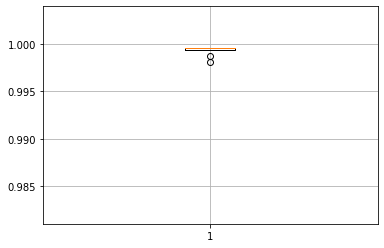

In [7]:
acc = df1['test_acc'].values
plt.boxplot([acc], showfliers=True, whis=0.75)
plt.grid()
plt.ylim([0.981,1.004])
acc

# Double Whisker Plots

In [131]:
# the function to plot double wisker

from matplotlib.ticker import FormatStrFormatter
from matplotlib.ticker import StrMethodFormatter
import seaborn as sns
def double_wisker(df, labels, y_range=None):
    ''' Plot double/triple wisker using sns, two labels, labels must match dataframe columns.
    x range is fixed [120, 240, 480, 960, 1920]'''

    x_entry=[60, 120, 240, 480, 960, 1920]
    n_entry = len(x_entry)

    # select only the rows we need.
    df1 = df.loc[df['model_name'].isin(labels)]
    
    # Plot wisker box
    # Problem here: the order of wiskers (who is left who is right) 
    # is automatically determined by the dataframe. Can't specify manually.
    # Here is a workaround.
    # The problem nolonger exist if df is sorted outside of the function.
    
    # Plot wisker box
    plt.figure(figsize=(9,7))
    sns.set(style="ticks")
    if len(labels) == 2:
        palette = 'PRGn'
        ax = sns.boxplot(x="ts_thres", y="test_f1", hue="model_name", data=df1, width=0.6, palette=palette, linewidth=2, whis=1.5, fliersize=4)
    else:
        palette = 'pastel'
        ax = sns.boxplot(x="ts_thres", y="test_f1", hue="model_name", data=df1, width=0.7, palette=palette, linewidth=2, whis=1.5, fliersize=4)

    # Configure plot
    ax.set_xlabel('Sample durations', fontsize=LABEL_SIZE)
    ax.set_ylabel('F1 Score (%)', fontsize=LABEL_SIZE)
    ax.yaxis.set_major_formatter(StrMethodFormatter('{x:.2%}'))
    plt.xticks(np.arange(0,n_entry), x_entry, fontsize=TICK_SIZE)
    plt.yticks(fontsize=TICK_SIZE)
    plt.legend(fontsize=LEGEND_SIZE)
    plt.grid()
    plt.ylabel('F1 Score', fontsize=LABEL_SIZE)
    ax.legend(loc='lower left', fontsize=LEGEND_SIZE)
    plt.xlim([0.5, 5.5])  # don't display the x=60 ticks.
    if y_range is not None:
        plt.ylim(y_range)

    # calculate median
    medians = []
    for label in labels:
        df_tmp = df.loc[df['model_name'].isin([label])]
        median_tmp = [df_tmp.loc[df_tmp.ts_thres==ts].test_f1.median() for ts in x_entry]
        medians.append(median_tmp)
    '''
    df1 = df.loc[df['model_name'].isin([label_1])]
    median_1 = [df1.loc[df1.ts_thres==ts].test_f1.median() for ts in x_entry]
    df2 = df.loc[df['model_name'].isin([label_2])]
    median_2 = [df2.loc[df2.ts_thres==ts].test_f1.median() for ts in x_entry]
    '''

    # plot median, 
    if len(medians) == 2:
        x_pos = np.array([1,2,3,4,5], dtype='float')
        x_offset = 0.15
        colors = sns.color_palette(palette)
        plt.plot(x_pos-x_offset, medians[0][1:], '--', marker='x', markersize=5, c='magenta', linewidth=1)
        plt.scatter(x_pos-x_offset, medians[0][1:], s=75, marker='x', c='black', linewidth=2)
        plt.plot(x_pos+x_offset, medians[1][1:], '--', marker='x', markersize=5, c='green', linewidth=1)
        plt.scatter(x_pos+x_offset, medians[1][1:], s=75, marker='x', c='black', linewidth=2)
    elif len(medians) == 3:
        x_pos = np.array([1,2,3,4,5], dtype='float')
        x_offset = 0.234
        colors = sns.color_palette(palette)
        MK_SZ = 100
        plt.plot(x_pos-x_offset, medians[0][1:], '--', marker='x', markersize=5, c=[c*0.75 for c in colors[0]], linewidth=2)
        plt.scatter(x_pos-x_offset, medians[0][1:], s=MK_SZ, marker='x', c='black', linewidth=2)
        plt.plot(x_pos, medians[1][1:], '--', marker='x', markersize=5, c=[c*0.75 for c in colors[1]], linewidth=2)
        plt.scatter(x_pos, medians[1][1:], s=MK_SZ, marker='x', c='black', linewidth=2)
        plt.plot(x_pos+x_offset, medians[2][1:], '--', marker='x', markersize=5, c=[c*0.75 for c in colors[2]], linewidth=2)
        plt.scatter(x_pos+x_offset, medians[2][1:], s=MK_SZ, marker='x', c='black', linewidth=2)
    else:
        print('Median not plotted.')

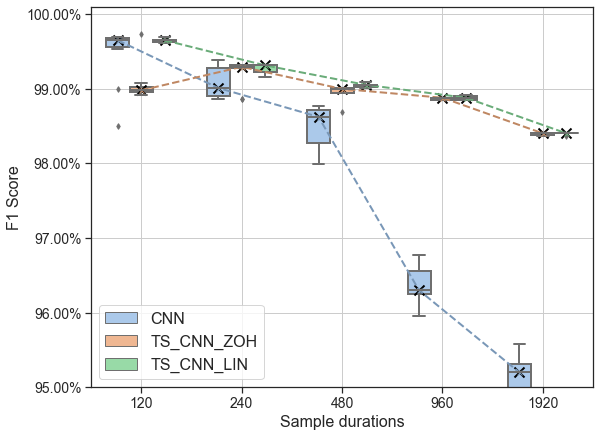

In [132]:
labels = ['CNN', 'TS_CNN_ZOH', 'TS_CNN_LIN']
double_wisker(df, labels,y_range = [0.95, 1.001])

## Multiple box plot - CNN

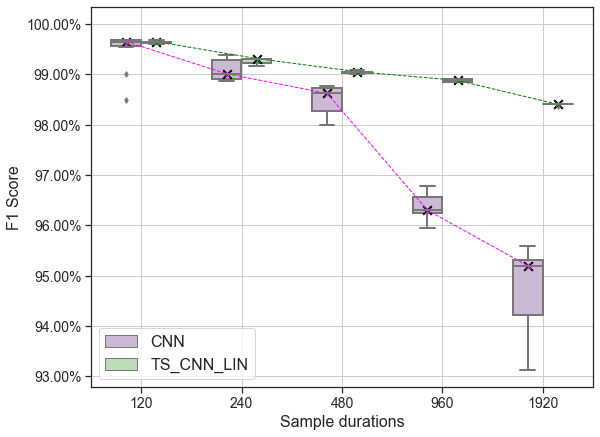

In [133]:
label_1 = 'CNN'
label_2 = 'TS_CNN_LIN'
double_wisker(df, [label_1, label_2])

## Multiple box plot - RNN

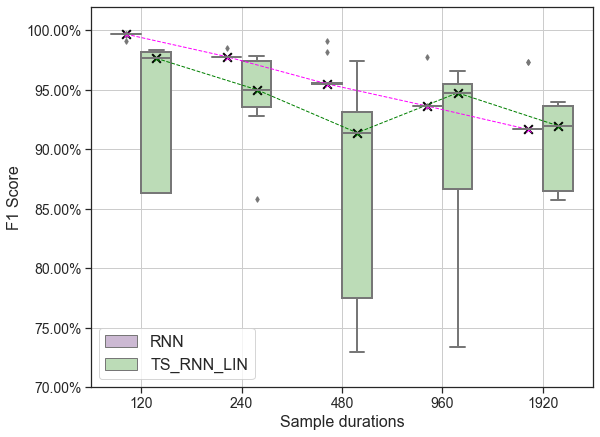

In [134]:
labels = ['RNN', 'TS_RNN_LIN']
double_wisker(df, labels, y_range=[0.7,1.02])

## Multiple box plot - CNN ZOH

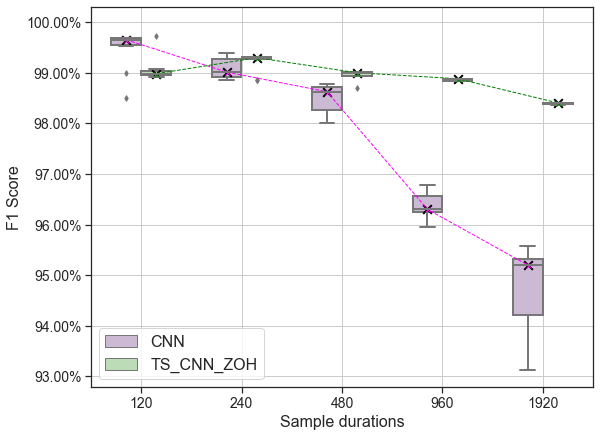

In [135]:
labels = ['CNN', 'TS_CNN_ZOH']
double_wisker(df, labels)

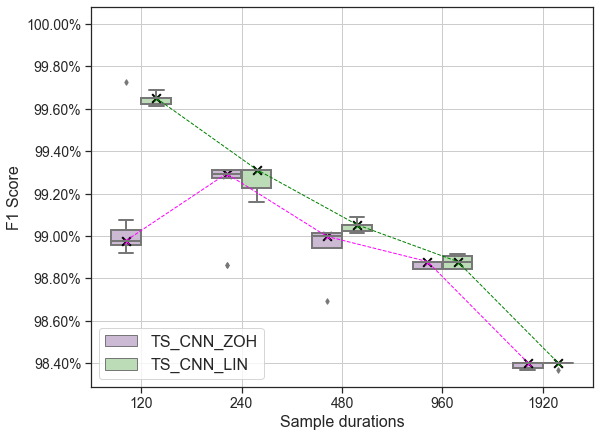

In [136]:
labels = ['TS_CNN_ZOH', 'TS_CNN_LIN']
double_wisker(df, labels)

## Multiple box plot - RNN ZOH

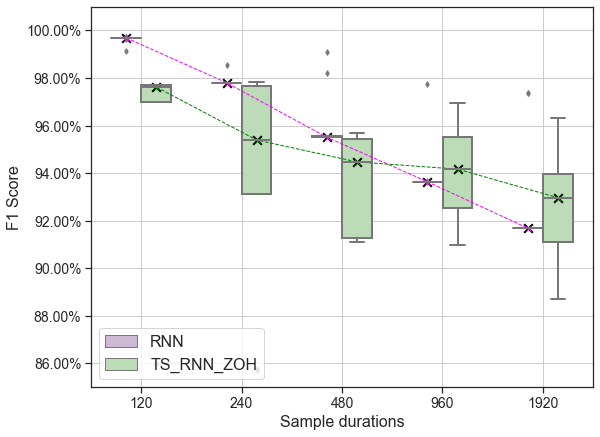

In [137]:
labels = ['RNN', 'TS_RNN_ZOH']
double_wisker(df, labels, y_range=[0.85,1.01])

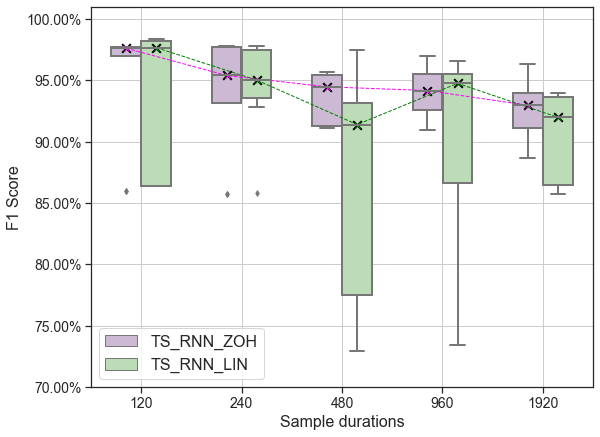

In [138]:
labels = ['TS_RNN_ZOH', 'TS_RNN_LIN']
double_wisker(df, labels,  y_range=[0.7,1.01])

# Legacy code

/usr/local/lib/python3.6/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)
/usr/local/lib/python3.6/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


(array([ 98. ,  98.5,  99. ,  99.5, 100. , 100.5]),
 <a list of 6 Text major ticklabel objects>)

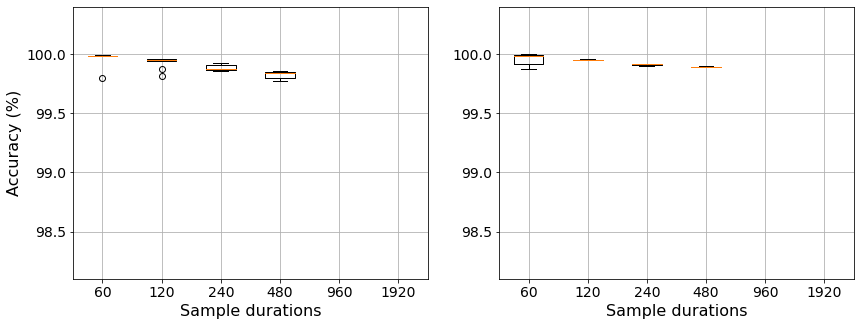

In [ ]:
df1 = df.loc[df.model_name=='CNN_1']
acc = []
labels = [60, 120, 240, 480, 960, 1920]
for ts in labels:
  df2 = df1.loc[df1.ts_thres==ts]
  acc.append(df2['test_acc'].values*100)

plt.figure(figsize=(14,5))
plt.subplot(1,2,1)
plt.boxplot(acc, showfliers=True, labels=labels) # whis=1
plt.grid()
plt.ylim([98.1,100.4])
plt.xlabel('Sample durations', fontsize=LABEL_SIZE)
plt.ylabel('Accuracy (%)', fontsize=LABEL_SIZE)
plt.xticks(fontsize=TICK_SIZE)
plt.yticks(fontsize=TICK_SIZE)

# 2nd piece
df1 = df.loc[df.model_name=='TS_CNN_1']
acc = []
labels = [60, 120, 240, 480, 960, 1920]
for ts in labels:
  df2 = df1.loc[df1.ts_thres==ts]
  acc.append(df2['test_acc'].values*100)

plt.subplot(1,2,2)
plt.boxplot(acc, showfliers=True, labels=labels)  # whis=1
plt.grid()
plt.ylim([98.1,100.4])
plt.xlabel('Sample durations', fontsize=LABEL_SIZE)
# plt.ylabel('Accuracy (%)', fontsize=LABEL_SIZE)
plt.xticks(fontsize=TICK_SIZE)
plt.yticks(fontsize=TICK_SIZE)

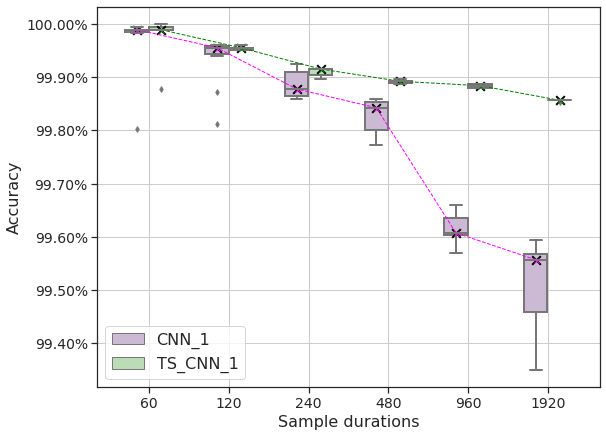

In [ ]:
from matplotlib.ticker import FormatStrFormatter
from matplotlib.ticker import StrMethodFormatter
import seaborn as sns

ts_label = [60, 120, 240, 480, 960, 1920]
df1 = df.loc[df['model_name'].isin(['CNN_1', 'TS_CNN_1'])]

plt.figure(figsize=(9,7))
sns.set(style="ticks")
ax = sns.boxplot(x="ts_thres", y="test_acc", hue="model_name", data=df1, width=0.6, palette="PRGn", linewidth=2, whis=1.5, fliersize=4)
ax.set_xlabel('Sample durations', fontsize=LABEL_SIZE)
ax.set_ylabel('Accuracy (%)', fontsize=LABEL_SIZE)
ax.yaxis.set_major_formatter(StrMethodFormatter('{x:.2%}'))
plt.xticks(np.arange(0,6), ts_label, fontsize=TICK_SIZE)
plt.yticks(fontsize=TICK_SIZE)
plt.legend(fontsize=LEGEND_SIZE)
plt.grid()
plt.ylabel('Accuracy', fontsize=LABEL_SIZE)
ax.legend(loc='lower left', fontsize=LEGEND_SIZE)
#plt.ylim([0.998, 1.0005])

# plot median
ts_label = [60, 120, 240, 480, 960, 1920]
df2 = df.loc[df['model_name'].isin(['CNN_1'])]
cnn_median = [df2.loc[df2.ts_thres==ts].test_acc.median() for ts in ts_label]
df2 = df.loc[df['model_name'].isin(['TS_CNN_1'])]
ts_cnn_median = [df2.loc[df2.ts_thres==ts].test_acc.median() for ts in ts_label]

x_pos = np.array([0,1,2,3,4,5], dtype='float')
x_offset = 0.15
plt.plot(x_pos-x_offset, cnn_median, '--', marker='x', markersize=5, c='magenta', linewidth=1)
plt.scatter(x_pos-x_offset, cnn_median, s=75, marker='x', c='black', linewidth=2)
plt.plot(x_pos+x_offset, ts_cnn_median, '--', marker='x', markersize=5, c='green', linewidth=1)
plt.scatter(x_pos+x_offset, ts_cnn_median, s=75, marker='x', c='black', linewidth=2)

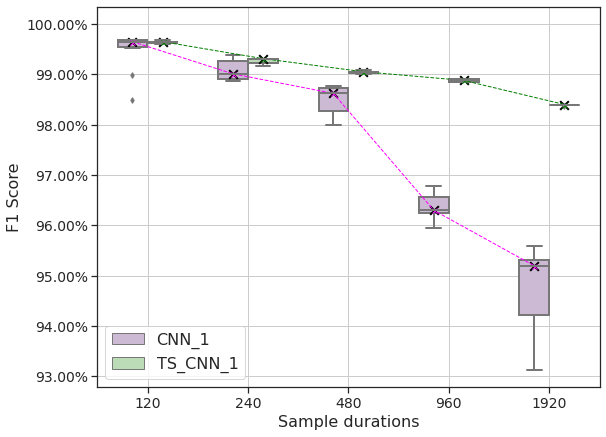

In [ ]:
# F1 score graph (120s+)
from matplotlib.ticker import FormatStrFormatter
from matplotlib.ticker import StrMethodFormatter
import seaborn as sns

ts_label = [60, 120, 240, 480, 960, 1920]
df1 = df.loc[df['model_name'].isin(['CNN_1', 'TS_CNN_1'])]

plt.figure(figsize=(9,7))
sns.set(style="ticks")
ax = sns.boxplot(x="ts_thres", y="test_f1", hue="model_name", data=df1, width=0.6, palette="PRGn", linewidth=2, whis=1.5, fliersize=4)
ax.set_xlabel('Sample durations', fontsize=LABEL_SIZE)
ax.set_ylabel('F1 Score (%)', fontsize=LABEL_SIZE)
ax.yaxis.set_major_formatter(StrMethodFormatter('{x:.2%}'))
plt.xticks(np.arange(0,6), ts_label, fontsize=TICK_SIZE)
plt.yticks(fontsize=TICK_SIZE)
plt.legend(fontsize=LEGEND_SIZE)
plt.grid()
plt.ylabel('F1 Score', fontsize=LABEL_SIZE)
ax.legend(loc='lower left', fontsize=LEGEND_SIZE)
plt.xlim([0.5, 5.5])
#plt.ylim([0.995, 1.0005])

# plot median
ts_label = [60, 120, 240, 480, 960, 1920]
df2 = df.loc[df['model_name'].isin(['CNN_1'])]
cnn_median = [df2.loc[df2.ts_thres==ts].test_f1.median() for ts in ts_label]
df2 = df.loc[df['model_name'].isin(['TS_CNN_1'])]
ts_cnn_median = [df2.loc[df2.ts_thres==ts].test_f1.median() for ts in ts_label]

x_pos = np.array([1,2,3,4,5], dtype='float')
x_offset = 0.15
plt.plot(x_pos-x_offset, cnn_median[1:], '--', marker='x', markersize=5, c='magenta', linewidth=1)
plt.scatter(x_pos-x_offset, cnn_median[1:], s=75, marker='x', c='black', linewidth=2)
plt.plot(x_pos+x_offset, ts_cnn_median[1:], '--', marker='x', markersize=5, c='green', linewidth=1)
plt.scatter(x_pos+x_offset, ts_cnn_median[1:], s=75, marker='x', c='black', linewidth=2)

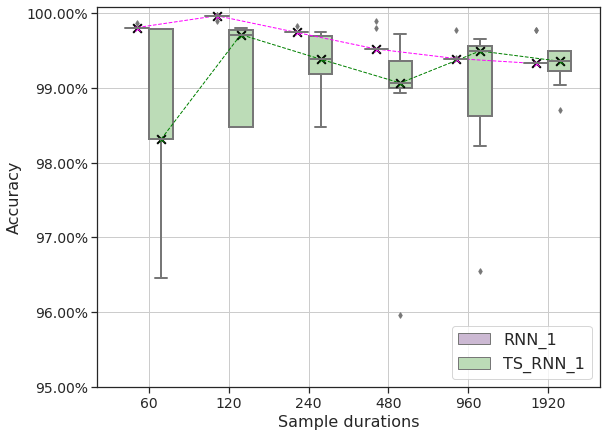

In [ ]:
# Accuracy score
from matplotlib.ticker import FormatStrFormatter
from matplotlib.ticker import StrMethodFormatter

ts_label = [60, 120, 240, 480, 960, 1920]
df1 = df.loc[df['model_name'].isin(['RNN_1', 'TS_RNN_1'])]

plt.figure(figsize=(9,7))
sns.set(style="ticks")
ax = sns.boxplot(x="ts_thres", y="test_acc", hue="model_name", data=df1, width=0.6, palette="PRGn", linewidth=2, whis=1.5, fliersize=4)
ax.set_xlabel('Sample durations', fontsize=LABEL_SIZE)
ax.set_ylabel('Accuracy (%)', fontsize=LABEL_SIZE)
ax.yaxis.set_major_formatter(StrMethodFormatter('{x:.2%}'))
# ax.xaxis.set_major_formatter(FormatStrFormatter('%.2f'))
plt.xticks(np.arange(0,6), ts_label, fontsize=TICK_SIZE)
plt.yticks(fontsize=TICK_SIZE)
plt.legend(fontsize=LEGEND_SIZE)
plt.ylim([0.950, 1.0008])
plt.grid()
plt.ylabel('Accuracy', fontsize=LABEL_SIZE)
plt.legend(loc='lower right',fontsize=LEGEND_SIZE)

# plot median
ts_label = [60, 120, 240, 480, 960, 1920]
df2 = df.loc[df['model_name'].isin(['RNN_1'])]
cnn_median = [df2.loc[df2.ts_thres==ts].test_acc.median() for ts in ts_label]
df2 = df.loc[df['model_name'].isin(['TS_RNN_1'])]
ts_cnn_median = [df2.loc[df2.ts_thres==ts].test_acc.median() for ts in ts_label]

x_pos = np.array([0,1,2,3,4,5], dtype='float')
x_offset = 0.15
plt.plot(x_pos-x_offset, cnn_median, '--', marker='x', markersize=5, c='magenta', linewidth=1)
plt.scatter(x_pos-x_offset, cnn_median, s=75, marker='x', c='black', linewidth=2)
plt.plot(x_pos+x_offset, ts_cnn_median, '--', marker='x', markersize=5, c='green', linewidth=1)
plt.scatter(x_pos+x_offset, ts_cnn_median, s=75, marker='x', c='black', linewidth=2)